In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [373]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [374]:
Path_train = 'adult.csv'
adult_data_df = pd.read_csv(Path_train)
adult_data = [adult_data_df]
adult_data_df.head(3)

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [375]:
Path_test = 'adult_test.csv'
adult_data_df_test = pd.read_csv(Path_test)
adult_data_test = [adult_data_df_test]

# adult_data_df_test.head(10)

In [376]:
adult_data_df.info()
adult_data_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital-Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs-per-week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning-potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [377]:
# adult_data_df.sample(100)

In [378]:
Ep_map = {'>50K':0 , '<=50K':1}
adult_data_df['Earning-potential'] = adult_data_df['Earning-potential'].map(Ep_map).astype('int64')

# adult_data_df.head(10)

In [379]:
adult_data_df_test['Earning-potential'] = adult_data_df_test['Earning-potential'].map(Ep_map).astype('int64')

# adult_data_df_test.head(10)

In [380]:
Sex_map = {'Female':0 , 'Male':1}
adult_data_df['Sex'] = adult_data_df['Sex'].map(Sex_map).astype('int64')

# adult_data_df.head(10)

In [381]:
adult_data_df_test['Sex'] = adult_data_df_test['Sex'].map(Sex_map).astype('int64')

# adult_data_df_test.head(10)

In [382]:
# adult_data_df.info()

In [383]:
# def plot_correlation(adult_data_df , size = 15):
#     corr = adult_data_df.corr()
#     fig , ax = plt.subplots(figsize=(size , size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)) , corr.columns)
#     plt.yticks(range(len(corr.columns)) , corr.columns)
#     plt.show()
# numeric_data = adult_data_df.select_dtypes(include = [np.number])
# plot_correlation(numeric_data)

In [384]:
adult_data_df[['Native-Country' , 'Earning-potential']].groupby(['Native-Country']).mean()

,Earning-potential
Native-Country,
?,0.749571
Cambodia,0.631579
Canada,0.677686
China,0.733333
Columbia,0.966102
Cuba,0.736842
Dominican-Republic,0.971429
Ecuador,0.857143
El-Salvador,0.915094


In [385]:
print(adult_data_df.shape)

adult_data_df['Native-Country'] = adult_data_df['Native-Country'].replace('?' , np.nan)
adult_data_df['Workclass'] = adult_data_df['Workclass'].replace('?' , np.nan)
adult_data_df['Occupation'] = adult_data_df['Occupation'].replace('?' , np.nan)

adult_data_df.dropna(how = 'any' , inplace = True)

print(adult_data_df.shape)

# adult_data_df.head(10)

(32561, 15)
(30162, 15)


In [386]:
print(adult_data_df_test.shape)

adult_data_df_test['Native-Country'] = adult_data_df_test['Native-Country'].replace('?' , np.nan)
adult_data_df_test['Workclass'] = adult_data_df_test['Workclass'].replace('?' , np.nan)
adult_data_df_test['Occupation'] = adult_data_df_test['Occupation'].replace('?' , np.nan)

adult_data_df_test.dropna(how = 'any' , inplace = True)

print(adult_data_df_test.shape)
# adult_data_df_test.head(10)

(16281, 15)
(15060, 15)


In [387]:
for dataset in adult_data:
    dataset.loc[dataset['Native-Country'] != 'United-States' , 'Native-Country'] = 'Non-US'
    dataset.loc[dataset['Native-Country'] == 'United-States' , 'Native-Country'] = 'US'

# adult_data_df.head(10)

In [388]:
for dataset_test in adult_data_test:
    dataset_test.loc[dataset_test['Native-Country'] != 'United-States' , 'Native-Country'] = 'Non-US'
    dataset_test.loc[dataset_test['Native-Country'] == 'United-States' , 'Native-Country'] = 'US'

# adult_data_df_test.head(10)

In [389]:
NC_map = {'Non-US':0 , 'US':1}
adult_data_df['Native-Country'] = adult_data_df['Native-Country'].map(NC_map).astype('int64')

# adult_data_df.head(10)

In [390]:
adult_data_df_test['Native-Country'] = adult_data_df_test['Native-Country'].map(NC_map).astype('int64')

# adult_data_df_test.head(10)

In [391]:
adult_data_df.info()
adult_data_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                30162 non-null  int64 
 1   Workclass          30162 non-null  object
 2   fnlwgt             30162 non-null  int64 
 3   Education          30162 non-null  object
 4   Education-num      30162 non-null  int64 
 5   Marital-Status     30162 non-null  object
 6   Occupation         30162 non-null  object
 7   Relationship       30162 non-null  object
 8   Race               30162 non-null  object
 9   Sex                30162 non-null  int64 
 10  Capital-gain       30162 non-null  int64 
 11  Capital-loss       30162 non-null  int64 
 12  hrs-per-week       30162 non-null  int64 
 13  Native-Country     30162 non-null  int64 
 14  Earning-potential  30162 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15

In [392]:
adult_data_df[['Relationship' , 'Earning-potential']].groupby(['Relationship']).mean()

,Earning-potential
Relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [393]:
adult_data_df[['Marital-Status' , 'Earning-potential']].groupby(['Marital-Status']).mean()

,Earning-potential
Marital-Status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


In [394]:
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].replace(['Divorced' , 'Married-spouse-absent' , 'Never-married' , 'Separated' , 'Widowed'] , 'Single')
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].replace(['Married-AF-spouse' , 'Married-civ-spouse'] , 'Couple')

# adult_data_df.head(10)

In [395]:
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].replace(['Divorced' , 'Married-spouse-absent' , 'Never-married' , 'Separated' , 'Widowed'] , 'Single')
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].replace(['Married-AF-spouse' , 'Married-civ-spouse'] , 'Couple')

# adult_data_df_test.head(10)

In [396]:
adult_data_df[['Marital-Status' , 'Earning-potential']].groupby(['Marital-Status']).mean()

,Earning-potential
Marital-Status,
Couple,0.545009
Single,0.931637


In [397]:
adult_data_df[['Marital-Status' , 'Relationship' , 'Earning-potential']].groupby(['Relationship' , 'Marital-Status']).mean()

Earning-potential
Relationship   Marital-Status                   
Husband        Couple                   0.544331
Not-in-family  Couple                   0.714286
               Single                   0.893802
Other-relative Couple                   0.857143
               Single                   0.976623
Own-child      Couple                   0.821429
               Single                   0.988818
Unmarried      Single                   0.933686
Wife           Couple                   0.506401

In [398]:
MS_map = {'Couple':0 , 'Single':1}
adult_data_df['Marital-Status'] = adult_data_df['Marital-Status'].map(MS_map).astype('int64')
   
# adult_data_df.head(10)

In [399]:
adult_data_df_test['Marital-Status'] = adult_data_df_test['Marital-Status'].map(MS_map).astype('int64')
   
# adult_data_df_test.head(10)

In [400]:
Rel_map = {'Unmarried':0 , 'Wife':1 , 'Husband':2 , 'Not-in-family':3 , 'Own-child':4 , 'Other-relative':5}
adult_data_df['Relationship'] = adult_data_df['Relationship'].map(Rel_map).astype('int64')
    
# adult_data_df.head(10)

In [401]:
adult_data_df_test['Relationship'] = adult_data_df_test['Relationship'].map(Rel_map).astype('int64')
    
# adult_data_df_test.head(10)

In [402]:
adult_data_df[['Race' , 'Earning-potential']].groupby('Race').mean()

,Earning-potential
Race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [403]:
Race_map = {'White':0 , 'Amer-Indian-Eskimo':1 , 'Asian-Pac-Islander':2 , 'Black':3 , 'Other':4}
adult_data_df['Race'] = adult_data_df['Race'].map(Race_map).astype('int64')
    
# adult_data_df.head(10)

In [404]:
adult_data_df_test['Race'] = adult_data_df_test['Race'].map(Race_map).astype('int64')
    
# adult_data_df_test.head(10)

In [405]:
adult_data_df[['Occupation' , 'Earning-potential']].groupby(['Occupation']).mean()

,Earning-potential
Occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [406]:
adult_data_df[['Workclass' , 'Earning-potential']].groupby(['Workclass']).mean()

,Earning-potential
Workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [407]:
def f_new_attributes(x):
    if x['Workclass'] == 'Federal-gov' or x['Workclass'] == 'Local-gov' or x['Workclass'] == 'State-gov': return 'Govt'
    elif x['Workclass'] == 'Private': return 'Private'
    elif x['Workclass'] == 'Self-emp-inc' or x['Workclass'] == 'Self-emp-not-inc': return 'Self_employed'
    else: return 'Without_pay'

adult_data_df['Employment_type'] = adult_data_df.apply(f_new_attributes , axis = 1)


In [408]:
adult_data_df_test['Employment_type'] = adult_data_df_test.apply(f_new_attributes , axis = 1)

# adult_data_df_test.head(10)

In [409]:
adult_data_df[['Employment_type' , 'Earning-potential']].groupby(['Employment_type']).mean()

,Earning-potential
Employment_type,
Govt,0.692702
Private,0.781208
Self_employed,0.632242
Without_pay,1.000000


In [410]:
Employment_map = {'Govt':0 , 'Private':1 , 'Self_employed':2 , 'Without_pay':3}
adult_data_df['Employment_type'] = adult_data_df['Employment_type'].map(Employment_map).astype('int64')

# adult_data_df.head(10)

In [411]:
adult_data_df_test['Employment_type'] = adult_data_df_test['Employment_type'].map(Employment_map).astype('int64')

# adult_data_df_test.head(10)

In [412]:
adult_data_df[['Education' , 'Earning-potential']].groupby(['Education']).mean()

,Earning-potential
Education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [413]:
adult_data_df.drop(labels = ['Workclass' , 'Education' , 'Occupation'] , axis = 1 , inplace = True)

# adult_data_df.head(10)

In [414]:
adult_data_df_test.drop(labels = ['Workclass' , 'Education' , 'Occupation'] , axis = 1 , inplace = True)

# adult_data_df_test.head(10)

In [415]:
# x = adult_data_df['Capital-gain']
# plt.hist(x , bins = None , density = None)
# plt.show()

In [416]:
adult_data_df.loc[(adult_data_df['Capital-gain'] > 0 , 'Capital-gain')] = 1
adult_data_df.loc[(adult_data_df['Capital-gain'] == 0 , 'Capital-gain')] = 0

# adult_data_df.head(100)

In [417]:
adult_data_df_test.loc[(adult_data_df_test['Capital-gain'] > 0 , 'Capital-gain')] = 1
adult_data_df_test.loc[(adult_data_df_test['Capital-gain'] == 0 , 'Capital-gain')] = 0

# adult_data_df_test.head(100)

In [418]:
# x = adult_data_df['Capital-loss']
# plt.hist(x , bins = None)
# plt.show()

In [419]:
adult_data_df.loc[(adult_data_df['Capital-loss'] > 0 , 'Capital-loss')] = 1
adult_data_df.loc[(adult_data_df['Capital-loss'] == 0 , 'Capital-loss')] = 0

adult_data_df.head(3)

,Age,fnlwgt,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1


In [420]:
adult_data_df_test.loc[(adult_data_df_test['Capital-loss'] > 0 , 'Capital-loss')] = 1
adult_data_df_test.loc[(adult_data_df_test['Capital-loss'] == 0 , 'Capital-loss')] = 0

adult_data_df_test.head(3)

,Age,fnlwgt,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,25,226802,7,1,4,3,1,0,0,40,1,1,1
1,38,89814,9,0,2,0,1,0,0,50,1,1,1
2,28,336951,12,0,2,0,1,0,0,40,1,0,0


In [421]:
from sklearn.preprocessing import StandardScaler

Scaler_test = StandardScaler()
adult_data_df['fnlwgt'] = Scaler_test.fit_transform(adult_data_df[['fnlwgt']])

Scaler_test = StandardScaler()
adult_data_df_test['fnlwgt'] = Scaler_test.fit_transform(adult_data_df_test[['fnlwgt']])
adult_data_df_test.head(3)

,Age,fnlwgt,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,25,0.352098,7,1,4,3,1,0,0,40,1,1,1
1,38,-0.944995,9,0,2,0,1,0,0,50,1,1,1
2,28,1.395062,12,0,2,0,1,0,0,40,1,0,0


In [422]:
n_bins = 5

adult_data_df['Age'] = pd.cut(adult_data_df['Age'] , bins = n_bins , labels = False)
adult_data_df['Education-num'] = pd.cut(adult_data_df['Education-num'] , bins = n_bins , labels = False)
adult_data_df['hrs-per-week'] = pd.cut(adult_data_df['hrs-per-week'] , bins = n_bins , labels = False)
adult_data_df = adult_data_df.drop('fnlwgt', axis=1)

adult_data_df.head(3)

,Age,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,1,3,1,3,0,1,1,0,1,1,1,0
1,2,3,0,2,0,1,0,0,0,1,1,2
2,1,2,1,3,0,1,0,0,1,1,1,1


In [423]:
adult_data_df_test['Age'] = pd.cut(adult_data_df_test['Age'] , bins = n_bins , labels = False)
adult_data_df_test['Education-num'] = pd.cut(adult_data_df_test['Education-num'] , bins = n_bins , labels = False)
adult_data_df_test['hrs-per-week'] = pd.cut(adult_data_df_test['hrs-per-week'] , bins = n_bins , labels = False)
adult_data_df_test = adult_data_df_test.drop('fnlwgt', axis=1)
adult_data_df_test.head(3)

,Age,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,0,1,1,4,3,1,0,0,1,1,1,1
1,1,2,0,2,0,1,0,0,2,1,1,1
2,0,3,0,2,0,1,0,0,1,1,0,0


In [424]:
mode = 'ID3'

def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row+1e-10) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset
    
    return total_entr

def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class+1e-10)  #entropy
        entropy += entropy_class
    return entropy

def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value

    output = calc_total_entropy(train_data, label, class_list) - feature_info    
    
    if mode == 'C4.5':
        # C4.5使用，計算分裂訊息
        entro = 0
        for feature_value in feature_value_list:
            feature_value_data = train_data[train_data[feature_name] == feature_value]
            feature_value_count = feature_value_data.shape[0]
            feature_rare = feature_value_count / train_data[feature_name].shape[0]
            entro -= feature_rare*np.log2(feature_rare+1e-10)
        output /= entro
    return output

def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) #finding the feature names in the dataset
                                            #N.B. label is not a feature, so dropping it
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  #for each feature in the dataset
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: #selecting feature name with highest information gain
            
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

def generate_sub_tree(feature_name, train_data, label, class_list, threshold=2/5):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) #dictionary of the count of unqiue feature value
    
    tree = {} #sub tree or node
    
    for feature_value, count in enumerate(feature_value_count_dict):
        feature_value_data = train_data[train_data[feature_name] == feature_value] #dataset with only feature_name = feature_value
        
        assigned_to_node = False #flag for tracking feature_value is pure class or not
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c
            if class_count >= count*threshold or count <= 2: #count of (feature_value = count) of class (pure class)
                tree[feature_value] = c #adding node to the tree
                train_data = train_data[train_data[feature_name] != feature_value] #removing rows with feature_value
                assigned_to_node = True

        if not assigned_to_node: #not pure class
            tree[feature_value] = "?" #as feature_value is not a pure class, it should be expanded further, 
                                      #so the branch is marking with ?
            
    return tree, train_data

def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: #if dataset becomes enpty after updating
        max_info_feature = find_most_informative_feature(train_data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset

def myTree(train_data_m, label):
    train_data = train_data_m.copy() #getting a copy of the dataset
    tree = {} #tree which will be updated
    class_list = train_data[label].unique() #getting unqiue classes of the label
    make_tree(tree, None, train_data, label, class_list) #start calling recursion
    return tree

def predict(tree, instance):
    if not isinstance(tree, dict): #if it is leaf node
        return tree #return the value
    else:
        root_node = next(iter(tree)) #getting first key/feature name of the dictionary
        feature_value = instance[root_node] #value of the feature
        if feature_value in tree[root_node]: #checking the feature value in current tree node
            return predict(tree[root_node][feature_value], instance) #goto next feature
        else:
            return None

def evaluate(tree, test_data_m, label):
    testbool = True
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows(): #for each row in the dataset
        if index >= test_data_m.values.shape[0]:
            continue
        
        result = predict(tree, test_data_m.iloc[index]) #predict the row
        if(testbool):
            testbool = False
            print("預測",result," ",test_data_m[label].iloc[index]," index ",index," ", test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]: #predicted value and expected value is same or not
            correct_preditct += 1 #increase correct count
        else:
            wrong_preditct += 1 #increase incorrect count
    accuracy = correct_preditct / (correct_preditct + wrong_preditct) #calculating accuracy
    return accuracy

In [425]:
# drop信息商較低的屬性可以降低overfittin率
# drop前的表現是0.72和0.72 (trainData / testData)
# drop後的表現是0.72和0.73 (trainData / testData)
i_list = []
gain_list = []
for i in adult_data_df.keys():
    infoGain = calc_info_gain(i, adult_data_df, "Earning-potential", [0, 1])
    i_list.append(i)
    gain_list.append(infoGain)

# bubble sort
for i in range(len(gain_list)-1, 0, -1):
    for j in range(i):
        if gain_list[j] > gain_list[j+1]:
            c = gain_list[j]
            gain_list[j] = gain_list[j+1]
            gain_list[j+1] = c
            c = i_list[j]
            i_list[j] = i_list[j+1]
            i_list[j+1] = c

print(i_list)
#for i in i_list[:6]:
    #adult_data_df = adult_data_df.drop(i, axis=1)
adult_data_df.head(3)

['Native-Country', 'Race', 'Employment_type', 'Capital-loss', 'Sex', 'Capital-gain', 'hrs-per-week', 'Age', 'Education-num', 'Marital-Status', 'Relationship', 'Earning-potential']


,Age,Education-num,Marital-Status,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs-per-week,Native-Country,Earning-potential,Employment_type
0,1,3,1,3,0,1,1,0,1,1,1,0
1,2,3,0,2,0,1,0,0,0,1,1,2
2,1,2,1,3,0,1,0,0,1,1,1,1


In [426]:
tree = myTree(adult_data_df, 'Earning-potential')
accuracy = evaluate(tree, adult_data_df, 'Earning-potential')
print("ID3 train score:", accuracy)
t_accuracy = evaluate(tree, adult_data_df_test, 'Earning-potential')
print("ID3 test score:", t_accuracy)
ID3accuracy = accuracy
ID3t_accuracy = t_accuracy
mode = "C4.5"
tree = myTree(adult_data_df, 'Earning-potential')
accuracy = evaluate(tree, adult_data_df, 'Earning-potential')
print("C4.5 train score:", accuracy)
t_accuracy = evaluate(tree, adult_data_df_test, 'Earning-potential')
print("C4.5 test score:",t_accuracy)
C4_5accuracy = accuracy
C4_5_accuracy = t_accuracy

預測 1   1  index  0   Age                  1
Education-num        3
Marital-Status       1
Relationship         3
Race                 0
Sex                  1
Capital-gain         1
Capital-loss         0
hrs-per-week         1
Native-Country       1
Earning-potential    1
Employment_type      0
Name: 0, dtype: int64


KeyboardInterrupt: 

In [ ]:
# data prepare

labels = adult_data_df['Earning-potential'].values
n_df = adult_data_df.drop('Earning-potential', axis=1)
attributes = n_df.values

t_labels = adult_data_df_test['Earning-potential'].values
t_df = adult_data_df_test.drop('Earning-potential', axis=1)
t_attributes = t_df.values


In [ ]:
# model build
# scikit-learn uses an optimized version of the CART algorithm as diffault
from sklearn.tree import DecisionTreeClassifier
# C5.0
C5_10 = DecisionTreeClassifier(criterion="entropy", min_samples_split=75, max_leaf_nodes=5)
C5_10.fit(attributes, labels)
C5_10_score = C5_10.score(attributes, labels)
print("C5.0 train score:", C5_10_score)
C5_10_score = C5_10.score(t_attributes, t_labels)
print("C5.0 test score:", C5_10_score)
# CART
CART = DecisionTreeClassifier(criterion="gini",  max_leaf_nodes=15)
CART.fit(attributes, labels)
CART_score = CART.score(attributes, labels)
print("CART train score:", CART_score)
CART_score = CART.score(t_attributes, t_labels)
print("CART test score:",  CART_score)

C5.0 train score: 0.8130097473642331
C5.0 test score: 0.8146746347941567
CART train score: 0.8271666335123665
CART test score: 0.8296148738379814


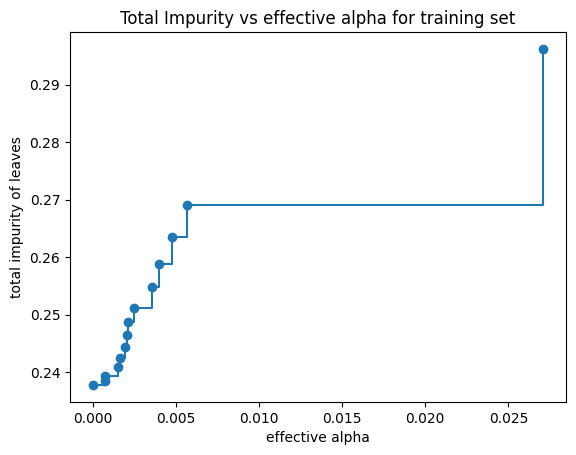

0.8296148738379814
Number of nodes in the last tree is: 1 with ccp_alpha: 0.07442273587820569


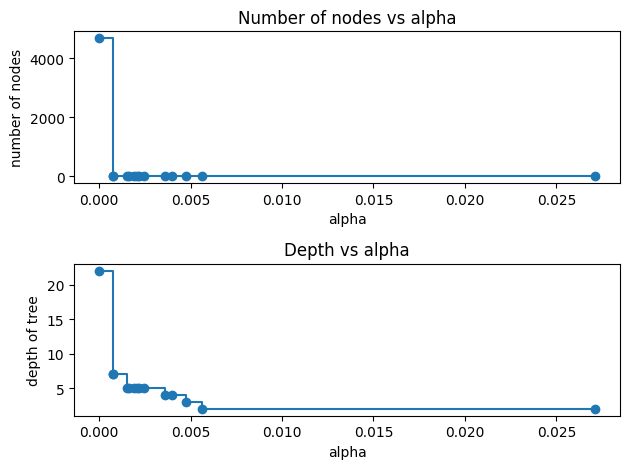

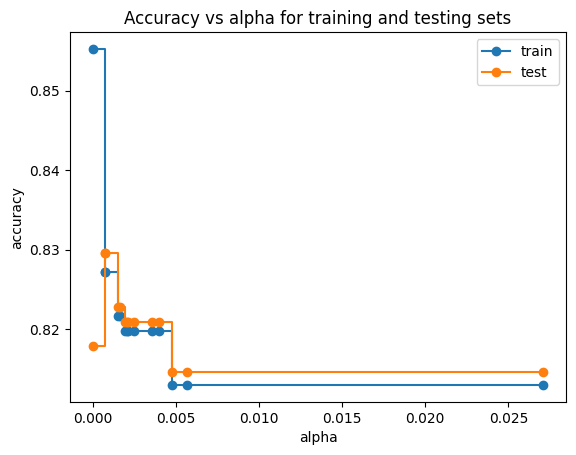

In [ ]:
# 使用CART探討不同參數的模型效能
path = CART.cost_complexity_pruning_path(t_attributes, t_labels)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

CART = DecisionTreeClassifier(criterion="gini",  max_leaf_nodes=15)
CART.fit(attributes, labels)
CART_score = CART.score(t_attributes, t_labels)
print(CART_score)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(attributes, labels)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()
fig.show()

train_scores = [clf.score(attributes, labels) for clf in clfs]
test_scores = [clf.score(t_attributes, t_labels) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


第一種alpha選擇(underfitting alpha)
test score: 0.8146746347941567


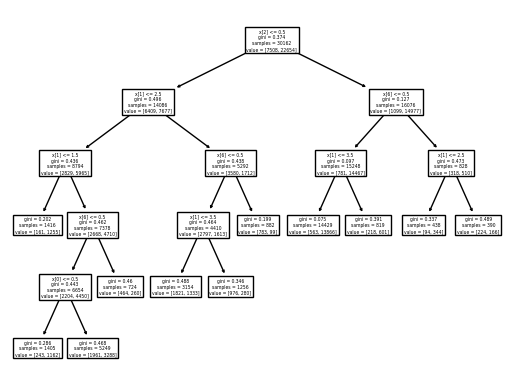

In [440]:
from sklearn import tree
print("第一種alpha選擇(underfitting alpha)")
test_scores = clfs[-1].score(t_attributes, t_labels)
print("test score:", test_scores)


t = tree.plot_tree(clfs[-10])
plt.savefig('第一種alpha選擇(underfitting alpha)', dpi=300)

第二種alpha選擇(best alpha)
test score: 0.8296148738379814


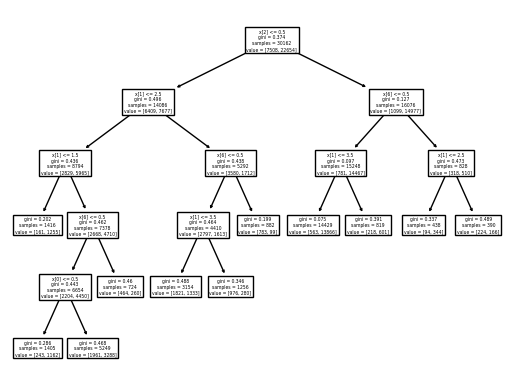

In [441]:
print("第二種alpha選擇(best alpha)")
test_scores = clfs[1].score(t_attributes, t_labels)
print("test score:", test_scores)
t = tree.plot_tree(clfs[-10])
plt.savefig('第二種alpha選擇(best alpha)', dpi=300)

第三種alpha選擇(overfitting alpha)
test score: 0.8179282868525897


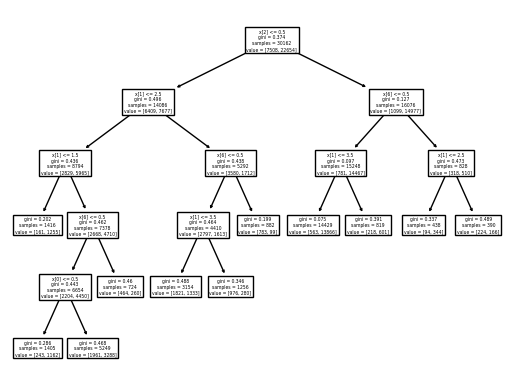

In [442]:
print("第三種alpha選擇(overfitting alpha)")
test_scores = clfs[0].score(t_attributes, t_labels)
print("test score:", test_scores)
t = tree.plot_tree(clfs[-10])
plt.savefig('第三種alpha選擇(overfitting alpha)', dpi=300)

Accuracy output

In [ ]:

# Additional imports
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Function to get predictions and probabilities (if available)
def get_predictions_and_probabilities(tree, features):
    # 初始化预测列表
    predictions = []
    
    # 对于标准模型，使用常规方法
    predictions = tree.predict(features)
    probabilities = None
    if hasattr(tree, "predict_proba"):
        probabilities = tree.predict_proba(features)

    return predictions, probabilities


# Placeholder for the models (this should be replaced with the actual model objects after training)
models = {
    "ID3": "ID3",  # Replace with the actual ID3 model ID3tree
    "C4.5": "C4.5",  # Replace with the actual C4.5 model C45tree
    "C5.0": C5_10,  # Assuming C5_10 is the trained C5.0 model
    "CART": CART  # Assuming CART is the trained CART model
}

# Placeholder for the feature arrays (this should be replaced with the actual feature arrays)
attributes = n_df.values  # Replace with the actual features for the test set adult_data_df, 'Earning-potential'
t_attributes = t_df.values  # Replace with the actual features for the training set

results = []

# Iterate over each model to get predictions and calculate metrics
for model_name, model in models.items():
    if(model == "ID3"):
        train_accuracy = ID3accuracy
        test_accuracy = ID3t_accuracy
    elif(model == "C4.5"):
        train_accuracy = C4_5accuracy
        test_accuracy = C4_5_accuracy
    else:
        # Get predictions and probabilities
        train_preds, train_probs = get_predictions_and_probabilities(model, attributes)
        test_preds, test_probs = get_predictions_and_probabilities(model, t_attributes)
        
        # Calculate metrics
        train_accuracy = accuracy_score(labels, train_preds)
        test_accuracy = accuracy_score(t_labels, test_preds)
    
    # Store the results
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        # Add more metrics if needed
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Export the results to an Excel file
results_df.to_excel("model_comparison_results.xlsx", index=False)


 C5.0, CART predict csv

In [429]:
# # 加载测试集
# test_data = pd.read_csv('adult_test.csv')

# # 确保模型已经训练并准备好进行预测
# # 这里的 'c50_model' 和 'cart_model' 需要替换为您的实际模型变量

# # 对于 C5.0 模型
# c50_predictions = C5_10.predict(adult_data_df_test.drop('Earning-potential', axis=1))
# test_data['Predict'] = c50_predictions
# test_data.to_csv('C5.0_adult_test.csv', index=False)

# # 对于 CART 模型
# cart_predictions = CART.predict(adult_data_df_test.drop('Earning-potential', axis=1))
# test_data['Predict'] = cart_predictions
# test_data.to_csv('CART_adult_test.csv', index=False)